In [1]:
# 1.0 Call libraries

import numpy as np
import pandas as pd
import os

# 1.1 Call sklearn libraries

# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
#mu-sigma by sd.   standardize
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz


# 1.1.5
# Install as:
#   conda install -c conda-forge python-graphviz 
#   conda install -c anaconda pydot
import graphviz

# 1.1.7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# 1.3 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Read the data file
from google.colab import files
uploaded=files.upload()

Saving Real_fake_news.csv to Real_fake_news (1).csv


In [4]:
df=pd.read_csv("Real_fake_news.csv")

In [5]:
df

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1
...,...,...,...,...,...,...,...,...
4865,2431,2431,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,2432,2432,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,2433,2433,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,2434,2434,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4870 non-null   int64 
 1   Unnamed: 0.1     4870 non-null   int64 
 2   author           4870 non-null   object
 3   statement        4870 non-null   object
 4   source           4870 non-null   object
 5   target           4870 non-null   bool  
 6   BinaryTarget     4870 non-null   object
 7   BinaryNumTarget  4870 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 271.2+ KB


In [7]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,BinaryNumTarget
count,4870.000000,4870.000000,4870.000000
mean,1217.500000,1217.500000,0.500000
std,702.996251,702.996251,0.500051
min,0.000000,0.000000,0.000000
25%,609.000000,609.000000,0.000000
50%,1217.500000,1217.500000,0.500000
75%,1826.000000,1826.000000,1.000000
max,2435.000000,2435.000000,1.000000


In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1


In [9]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
4865,2431,2431,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,2432,2432,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,2433,2433,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,2434,2434,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0
4869,2435,2435,Bill McCarthy,"""Twitter caught leaking Donald Trump’s private...",Bloggers,False,FAKE,0


In [10]:
df.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
author             0
statement          0
source             0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1
2,2,2,Emily Zirkelbach,“FUN FACT: West Virginia is home to zero billi...,David Gura,True,REAL,1
3,3,3,Madeline Heim,Says gubernatorial candidate Rebecca Kleefisch...,Kelda Helen Roys,True,REAL,1
4,4,4,Sabine Martin,"The Biden administration ""published a study co...",Randy Feenstra,True,REAL,1
...,...,...,...,...,...,...,...,...
4865,2431,2431,Bill McCarthy,"""Clinton campaign official arrested by FBI on ...",Bloggers,False,FAKE,0
4866,2432,2432,Miriam Valverde,"""Our courts find that 80 percent of those who ...",Jeff Sessions,False,FAKE,0
4867,2433,2433,Kiannah Sepeda-Miller,Says a progressive income tax proposal from De...,Evelyn Sanguinetti,False,FAKE,0
4868,2434,2434,Manuela Tobias,"""Maxine Waters Is Getting Criminally Charged!""",Bloggers,False,FAKE,0


In [13]:
df.size

38960

In [14]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [15]:
df['author']= label_encoder.fit_transform(df['author'])
df['source']= label_encoder.fit_transform(df['source'])

In [18]:
df

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,128,"New York is ""leading the nation with the lowes...",1035,True,REAL,1
1,1,1,82,“Iowa ranks 45th in the U.S. for internet conn...,247,True,REAL,1
2,2,2,87,“FUN FACT: West Virginia is home to zero billi...,321,True,REAL,1
3,3,3,186,Says gubernatorial candidate Rebecca Kleefisch...,791,True,REAL,1
4,4,4,252,"The Biden administration ""published a study co...",1153,True,REAL,1
...,...,...,...,...,...,...,...,...
4865,2431,2431,34,"""Clinton campaign official arrested by FBI on ...",135,False,FAKE,0
4866,2432,2432,215,"""Our courts find that 80 percent of those who ...",622,False,FAKE,0
4867,2433,2433,161,Says a progressive income tax proposal from De...,443,False,FAKE,0
4868,2434,2434,192,"""Maxine Waters Is Getting Criminally Charged!""",135,False,FAKE,0


In [22]:
X=df[['author','source']]

In [19]:
df.corr

<bound method DataFrame.corr of       Unnamed: 0  Unnamed: 0.1  author  ... target  BinaryTarget  BinaryNumTarget
0              0             0     128  ...   True          REAL                1
1              1             1      82  ...   True          REAL                1
2              2             2      87  ...   True          REAL                1
3              3             3     186  ...   True          REAL                1
4              4             4     252  ...   True          REAL                1
...          ...           ...     ...  ...    ...           ...              ...
4865        2431          2431      34  ...  False          FAKE                0
4866        2432          2432     215  ...  False          FAKE                0
4867        2433          2433     161  ...  False          FAKE                0
4868        2434          2434     192  ...  False          FAKE                0
4869        2435          2435      34  ...  False          FAKE  

In [23]:
y=df['BinaryNumTarget']

In [24]:
# 2.4 Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler()

In [25]:
# 2.5 Split X and y into train and test data:

X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

# 2.5.1 About train data:
                                   
X_train.shape  # (105,4)
print()

# 2.5.2 Test data:

X_test.shape   # (45,4)
print()

(3409, 2)

(1461, 2)

In [26]:
# 3. Start modeling
# 3.1 Initialize our decision tree object.
#     Supply relevant parameters

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [27]:
# 3.2 Train our decision tree:

ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
# 4.0 Make predictions of test data
y_te = ct.predict(X_test)

In [29]:
# 4.1 Get accuracy:

np.sum((y_test == y_te))/y_test.size  # 0.93

0.8501026694045175

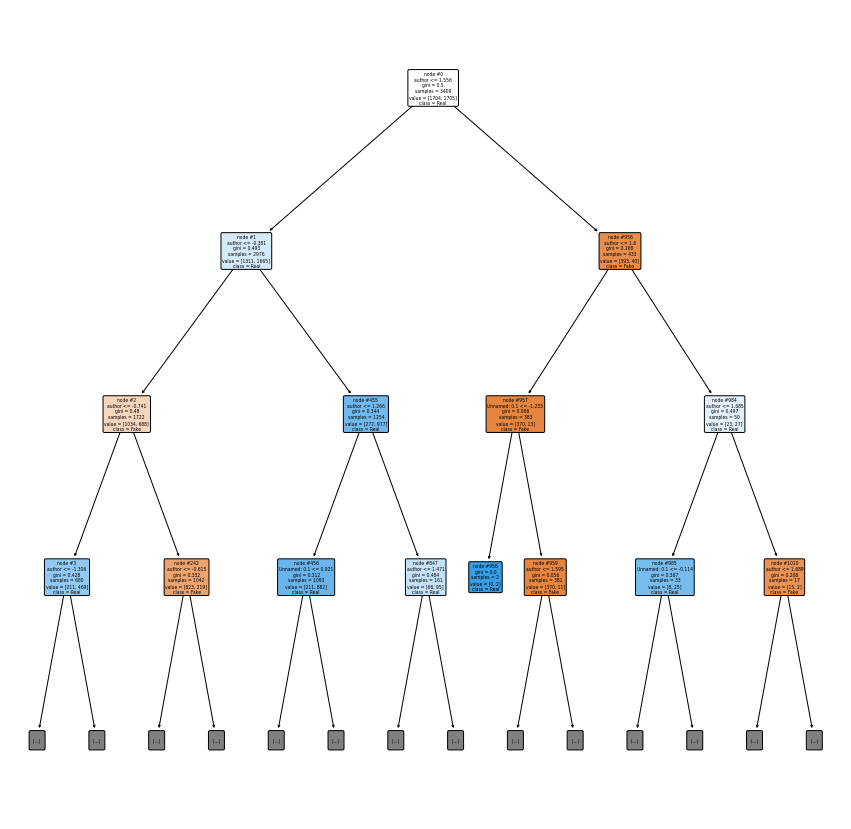

In [30]:
# 4.2 Plot decision tree
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Fake","Real"]
            )

_=plt.show()

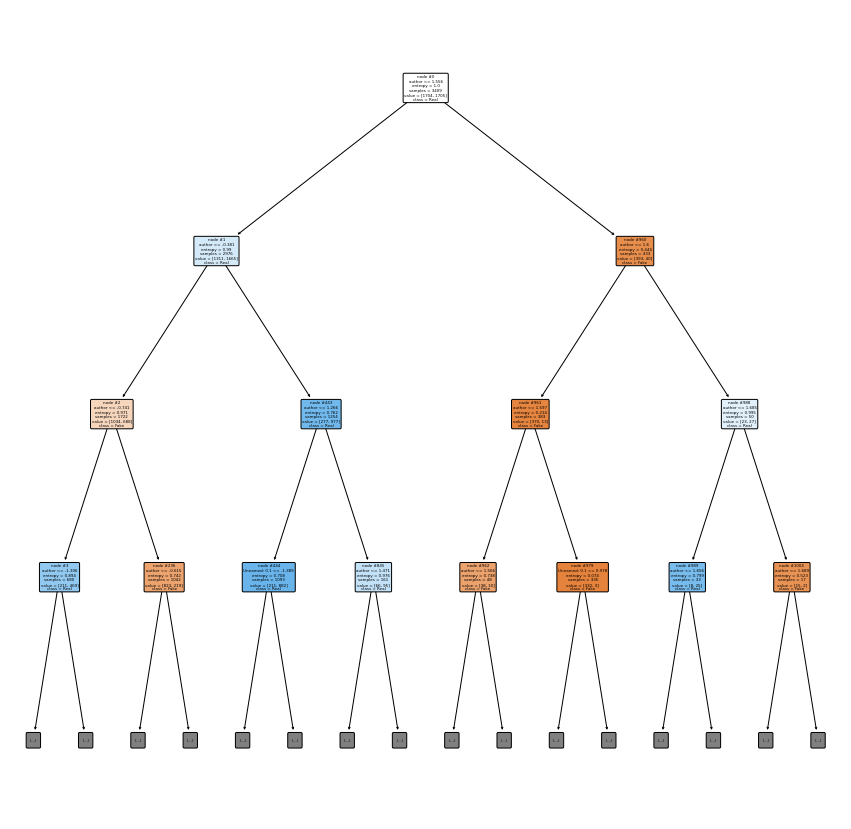

In [31]:
# 5.0 Plot decision tree with 'entropy' as criterion:

ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Fake","Real"]
            )

_=plt.show()

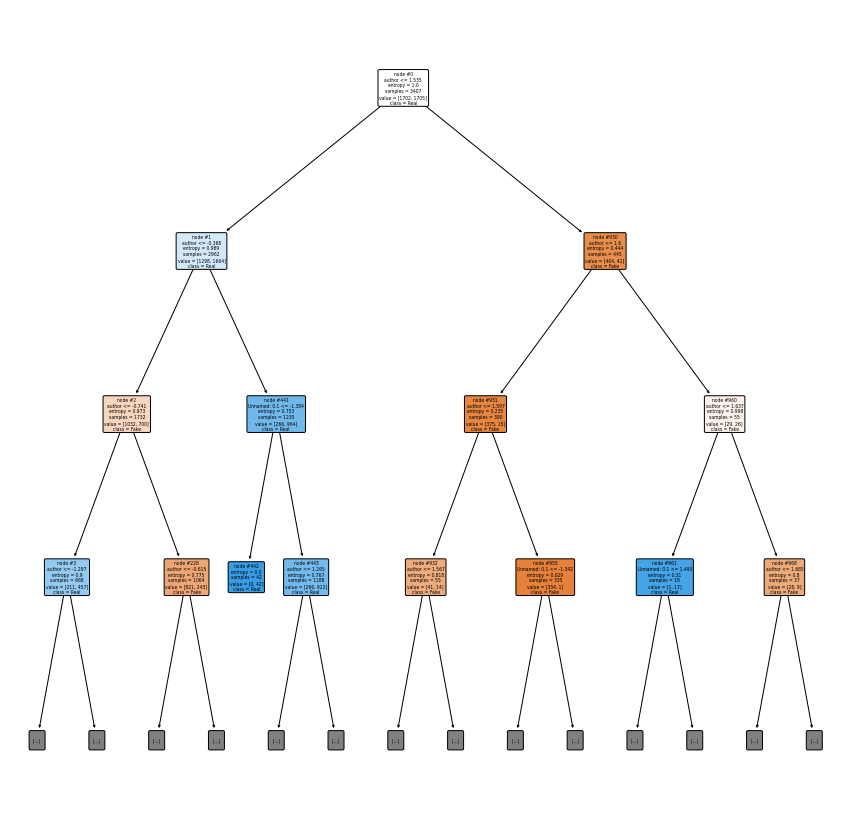

In [32]:
# 5.3 Remove just two rows and decision tree changes:


X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

ct1 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
_=ct1.fit(X_train[2:,:],y_train[2:])

##
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct1,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Fake","Real"]
            )

_=plt.show()

In [33]:
# 5.4 Make predictions of test data
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size  

0.9370294318959617